# Boston Housing Study

In this study, we are interested in estimating the mean market value of the residential real estate in Boston area. We will use and compare different modeling methods  (linear and tree based), then recommend the use of one of them.

## Import packages

In [202]:
# Operating system basic packages
import os # operating system
import gc # garbage collector
import random # random seed generator

# basic daraframe, array and math
import pandas as pd  # data frame operations  
import math # math functions
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  # pretty plotting, including heat map

# Scikit Learn
import sklearn as sk # scikit learn
from sklearn.utils import resample # sampling
from sklearn.model_selection import train_test_split as tts # train test split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet # lieanr models import
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score # metrics import
from math import sqrt  # for root mean-squared error calculation

# suppress warning messages
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from sklearn import model_selection # needed models
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # imputer
from sklearn.ensemble import BaggingRegressor as BR # Bagging regression
from sklearn.ensemble import RandomForestRegressor as RFR # Random Forest regression
from sklearn.ensemble import ExtraTreesRegressor as ETR # Random Forest regression
from sklearn.ensemble import GradientBoostingRegressor as GBR # Gradient Boosting regression
from pandas.plotting import scatter_matrix






# Eploratory Data Anaysis

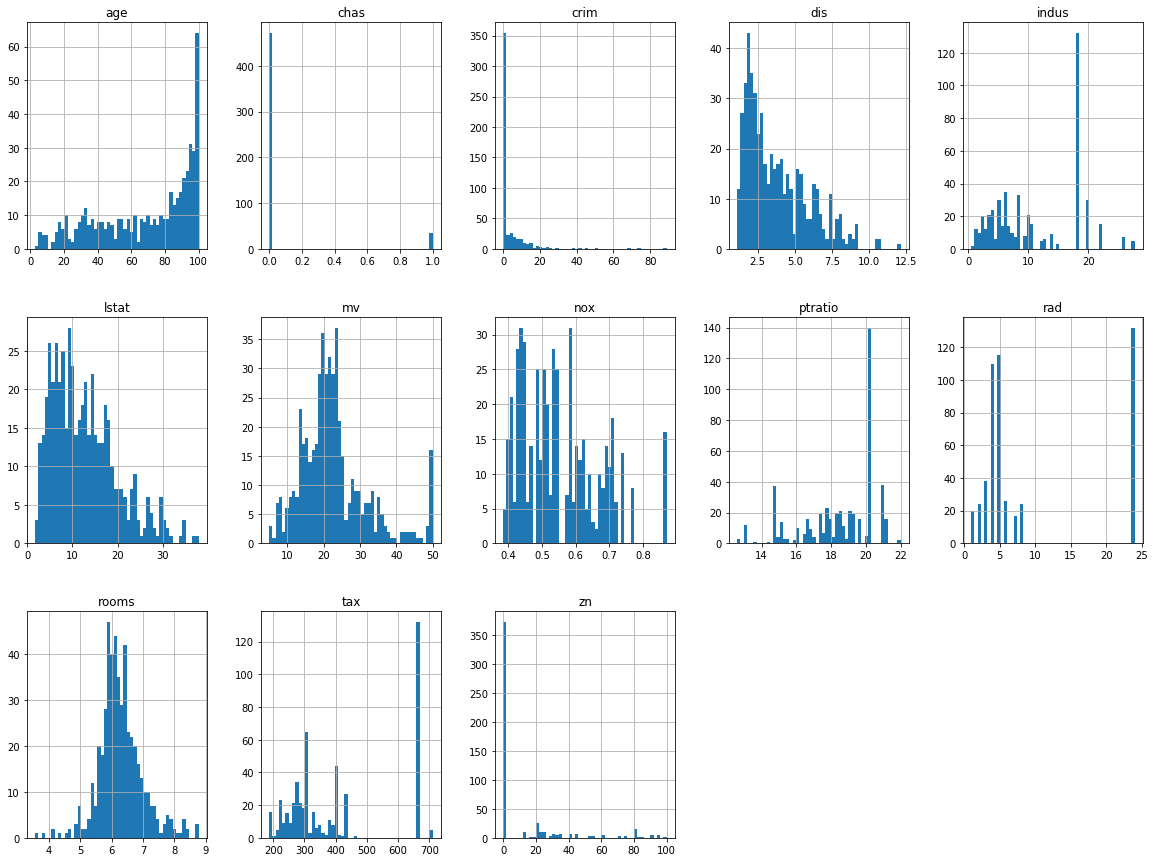

In [203]:
# histograms for variables in boston housing data set
#fig, axis = plt.subplots()
hist = boston_input.hist(layout=(3,5), bins=50, figsize=(20,15))


<Figure size 432x288 with 0 Axes>

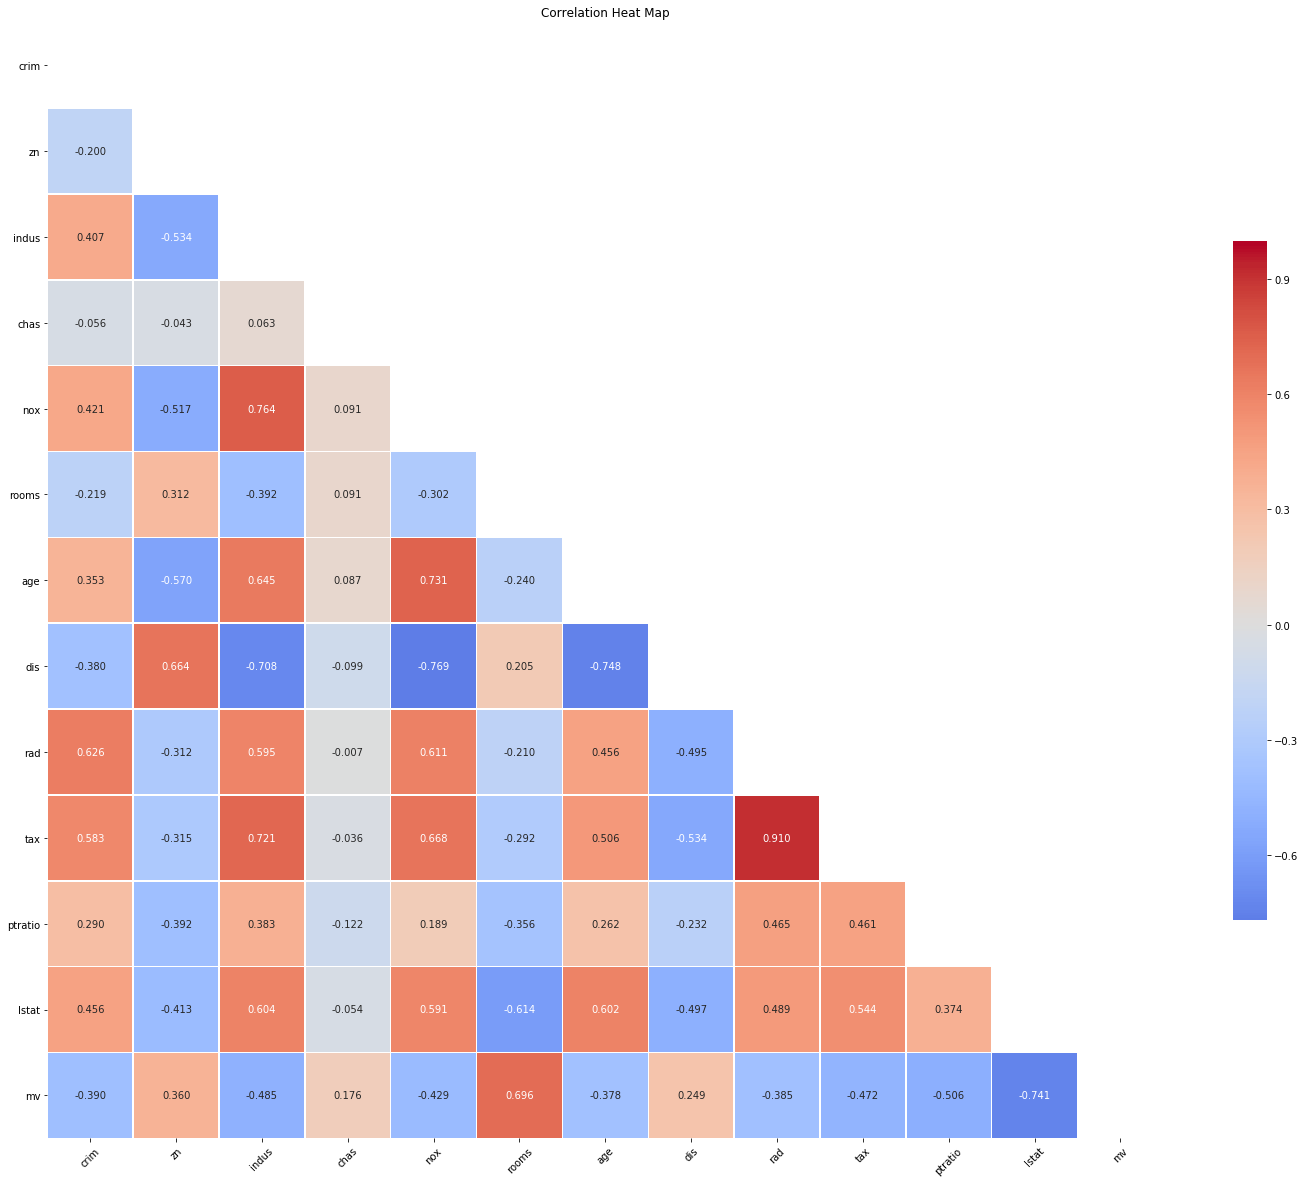

In [204]:
# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(25,25))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 10}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

np.set_printoptions(precision=3)

corr_chart(df_corr = boston_input)

# Outliers and skaling

# K-Fold Cross Validation

In [205]:
# Load the data
boston2 = pd.read_csv('boston.csv')

# Drop the neighborhood variable based on assignment instructions
boston2.drop(['neighborhood'], axis=1, inplace=True)

# Define scaled predictor variables as an array for sklearn use
x = scaler.fit_transform(boston2.drop(['mv'], axis=1).values)

# Define log-target as an array for sklearn use
y = np.log(boston2['mv']).values

# define the input for the K-Fold algorithm
model_data = np.c_[y, x]

In [206]:
model_data

array([[ 3.178, -0.42 ,  0.285, ..., -0.667, -1.459, -1.076],
       [ 3.073, -0.417, -0.488, ..., -0.987, -0.303, -0.492],
       [ 3.547, -0.417, -0.488, ..., -0.987, -0.303, -1.209],
       ...,
       [ 3.174, -0.413, -0.488, ..., -0.803,  1.176, -0.983],
       [ 3.091, -0.408, -0.488, ..., -0.803,  1.176, -0.865],
       [ 2.944, -0.415, -0.488, ..., -0.803,  1.176, -0.669]])

In [207]:
SET_FIT_INTERCEPT=True
RANDOM_SEED=1234
# --------------------------------------------------------
# specify the set of regression models being evaluated
# we set normalize=False because we have standardized
# the model input data outside of the modeling method calls

# list of regression model names
names = ['ElasticNet_Regression', 
         'Lasso_Regression',
         'Linear_Regression', 
         'Ridge_Regression', 
         'Random_Forest Max_feat=1 & n_est=100', 
         'Random_forest Max_feat=log2 & n_est=100', 
         'Random_forest Max_feat=1 & n_est=150',
         'Random_forest Max_feat=log2 & n_est=150',
         'Random_forest Max_feat=No, Max_depth=2 & n_est=150',
         'Gradient_Boosting Max_depth=2 & n_est=10',
         'Gradient_Boosting Max_depth=2 & n_est=60',
         'Gradient_Boosting Max_depth=2 & n_est=120',
         'Gradient_Boosting Max_depth=4 & n_est=10',
         'Gradient_Boosting Max_depth=4 & n_est=60',
         'Gradient_Boosting Max_depth=4 & n_est= 120'] 

# list of regressors
regressors = [ElasticNet(alpha = 0.5, l1_ratio = 0.1, 
                          max_iter=10000, tol=0.01, 
                          fit_intercept = SET_FIT_INTERCEPT, 
                          normalize = False, 
                          random_state = RANDOM_SEED),
              Lasso(alpha = 0.2, max_iter=10000, tol=0.01, 
                     fit_intercept = SET_FIT_INTERCEPT,
                     normalize=False,
                     random_state = RANDOM_SEED),
              LinearRegression(fit_intercept = SET_FIT_INTERCEPT),
              Ridge(alpha = 50, solver = 'cholesky', 
                     fit_intercept = SET_FIT_INTERCEPT, 
                     normalize = False, 
                     random_state = RANDOM_SEED),
              RFR(max_features=1, n_estimators=100, bootstrap = True, random_state=RANDOM_SEED),
              RFR(max_features="log2", n_estimators=100, bootstrap = True, random_state=RANDOM_SEED),
              RFR(max_features=1, n_estimators=150, bootstrap = True, random_state=RANDOM_SEED),
              RFR(max_features="log2", n_estimators=150, bootstrap = True, random_state=RANDOM_SEED),
              RFR(n_estimators=150, max_depth=2, bootstrap = True, random_state=RANDOM_SEED),
              GBR(max_depth=2, n_estimators=10, random_state=RANDOM_SEED),
              GBR(max_depth=2, n_estimators=60, random_state=RANDOM_SEED),
              GBR(max_depth=2, n_estimators=120, random_state=RANDOM_SEED),
              GBR(max_depth=4, n_estimators=10, random_state=RANDOM_SEED),
              GBR(max_depth=4, n_estimators=60, random_state=RANDOM_SEED),
              GBR(max_depth=4, n_estimators=120, random_state=RANDOM_SEED)]
#              RFR(n_estimators=150, max_depth=2, bootstrap = True, random_state=RANDOM_SEED)]

# --------------------------------------------------------
# specify the k-fold cross-validation design
from sklearn.model_selection import KFold

# ten-fold cross-validation employed here
# As an alternative to 10-fold cross-validation, restdata with its 
# small sample size could be analyzed would be a good candidate
# for  leave-one-out cross-validation, which would set the number
# of folds to the number of observations in the data set.
N_FOLDS = 10

# set up numpy array for storing results
cv_results = np.zeros((N_FOLDS, len(names)))

kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)
# check the splitting process by looking at fold observation counts

index_for_fold = 0  # fold count initialized 

for train_index, test_index in kf.split(model_data):
    print('\nFold index:', index_for_fold,
          '------------------------------------------')
#   the structure of modeling data for this study has the
#   response variable coming first and explanatory variables later          
#   so 1:model_data.shape[1] slices for explanatory variables
#   and 0 is the index for the response variable    
    X_train = model_data[train_index, 1:model_data.shape[1]]
    X_test = model_data[test_index, 1:model_data.shape[1]]
    y_train = model_data[train_index, 0]
    y_test = model_data[test_index, 0]   
#    print('\nShape of input data for this fold:',
#          '\nData Set: (Observations, Variables)')
#    print('X_train:', X_train.shape)
#    print('X_test:',X_test.shape)
#    print('y_train:', y_train.shape)
#    print('y_test:',y_test.shape)

    index_for_method = 0  # initialize
    for name, reg_model in zip(names, regressors):
        print('\nRegression model evaluation for:', name)
        print('  Scikit Learn method:', reg_model)
        reg_model.fit(X_train, y_train)  # fit on the train set for this fold
#        print('Fitted regression intercept:', reg_model.intercept_)
#        print('Fitted regression coefficients:', reg_model.coef_)
    
        # evaluate on the test set for this fold
        y_test_predict = reg_model.predict(X_test)
#        print('Coefficient of determination (R-squared):', r2_score(y_test, y_test_predict))
        fold_method_result = sqrt(mean_squared_error(y_test, y_test_predict))
#        print(reg_model.get_params(deep=True))
        print('Root mean-squared error:', fold_method_result)
        cv_results[index_for_fold, index_for_method] = fold_method_result
        index_for_method += 1
  
    index_for_fold += 1

cv_results_df = pd.DataFrame(cv_results)
cv_results_df.columns = names

print('\n----------------------------------------------')
print('Average results from ', N_FOLDS, '-fold cross-validation\n',
      'in standardized units (mean 0, standard deviation 1)\n',
      '\nMethod               Root mean-squared error', sep = '')     
print(cv_results_df.mean())   


Fold index: 0 ------------------------------------------

Regression model evaluation for: ElasticNet_Regression
  Scikit Learn method: ElasticNet(alpha=0.5, copy_X=True, fit_intercept=True, l1_ratio=0.1,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=1234, selection='cyclic', tol=0.01, warm_start=False)
Root mean-squared error: 0.16156467372859007

Regression model evaluation for: Lasso_Regression
  Scikit Learn method: Lasso(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=1234,
      selection='cyclic', tol=0.01, warm_start=False)
Root mean-squared error: 0.1832730115789711

Regression model evaluation for: Linear_Regression
  Scikit Learn method: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Root mean-squared error: 0.1206154699899623

Regression model evaluation for: Ridge_Regression
  Scikit Learn method: Ridge(

Root mean-squared error: 0.1719225389889753

Fold index: 1 ------------------------------------------

Regression model evaluation for: ElasticNet_Regression
  Scikit Learn method: ElasticNet(alpha=0.5, copy_X=True, fit_intercept=True, l1_ratio=0.1,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=1234, selection='cyclic', tol=0.01, warm_start=False)
Root mean-squared error: 0.11633877424938152

Regression model evaluation for: Lasso_Regression
  Scikit Learn method: Lasso(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=1234,
      selection='cyclic', tol=0.01, warm_start=False)
Root mean-squared error: 0.1642381580693275

Regression model evaluation for: Linear_Regression
  Scikit Learn method: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Root mean-squared error: 0.1450945498646182

Regression model evaluation for: Ri

Root mean-squared error: 0.08343762729219781

Fold index: 2 ------------------------------------------

Regression model evaluation for: ElasticNet_Regression
  Scikit Learn method: ElasticNet(alpha=0.5, copy_X=True, fit_intercept=True, l1_ratio=0.1,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=1234, selection='cyclic', tol=0.01, warm_start=False)
Root mean-squared error: 0.1038116579318246

Regression model evaluation for: Lasso_Regression
  Scikit Learn method: Lasso(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=1234,
      selection='cyclic', tol=0.01, warm_start=False)
Root mean-squared error: 0.11900576838175753

Regression model evaluation for: Linear_Regression
  Scikit Learn method: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Root mean-squared error: 0.20763085393754233

Regression model evaluation for: 

Root mean-squared error: 0.16624342556937965

Fold index: 3 ------------------------------------------

Regression model evaluation for: ElasticNet_Regression
  Scikit Learn method: ElasticNet(alpha=0.5, copy_X=True, fit_intercept=True, l1_ratio=0.1,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=1234, selection='cyclic', tol=0.01, warm_start=False)
Root mean-squared error: 0.2807702757275875

Regression model evaluation for: Lasso_Regression
  Scikit Learn method: Lasso(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=1234,
      selection='cyclic', tol=0.01, warm_start=False)
Root mean-squared error: 0.4042118464226907

Regression model evaluation for: Linear_Regression
  Scikit Learn method: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Root mean-squared error: 0.17316411785066815

Regression model evaluation for: R

Root mean-squared error: 0.1912444186008834

Fold index: 4 ------------------------------------------

Regression model evaluation for: ElasticNet_Regression
  Scikit Learn method: ElasticNet(alpha=0.5, copy_X=True, fit_intercept=True, l1_ratio=0.1,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=1234, selection='cyclic', tol=0.01, warm_start=False)
Root mean-squared error: 0.21201095387595925

Regression model evaluation for: Lasso_Regression
  Scikit Learn method: Lasso(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=1234,
      selection='cyclic', tol=0.01, warm_start=False)
Root mean-squared error: 0.3064328824366691

Regression model evaluation for: Linear_Regression
  Scikit Learn method: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Root mean-squared error: 0.1894468381875067

Regression model evaluation for: Ri

Root mean-squared error: 0.13569347711421806

Regression model evaluation for: Gradient_Boosting Max_depth=4 & n_est= 120
  Scikit Learn method: GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=120,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1234, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
Root mean-squared error: 0.13247486310253326

Fold index: 5 ------------------------------------------

Regression model evaluation for: ElasticNet_Regression
  Scikit Learn method: Elastic

Root mean-squared error: 0.16183953468368567

Fold index: 6 ------------------------------------------

Regression model evaluation for: ElasticNet_Regression
  Scikit Learn method: ElasticNet(alpha=0.5, copy_X=True, fit_intercept=True, l1_ratio=0.1,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=1234, selection='cyclic', tol=0.01, warm_start=False)
Root mean-squared error: 0.14425552433103045

Regression model evaluation for: Lasso_Regression
  Scikit Learn method: Lasso(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=1234,
      selection='cyclic', tol=0.01, warm_start=False)
Root mean-squared error: 0.15215547132142157

Regression model evaluation for: Linear_Regression
  Scikit Learn method: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Root mean-squared error: 0.13139076769503139

Regression model evaluation for:

Root mean-squared error: 0.1233718926620028

Regression model evaluation for: Gradient_Boosting Max_depth=4 & n_est= 120
  Scikit Learn method: GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=120,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1234, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
Root mean-squared error: 0.12157908548885528

Fold index: 7 ------------------------------------------

Regression model evaluation for: ElasticNet_Regression
  Scikit Learn method: ElasticN

Root mean-squared error: 0.33867804608499896

Regression model evaluation for: Gradient_Boosting Max_depth=4 & n_est= 120
  Scikit Learn method: GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=120,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1234, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
Root mean-squared error: 0.3346206539892556

Fold index: 8 ------------------------------------------

Regression model evaluation for: ElasticNet_Regression
  Scikit Learn method: ElasticN

Root mean-squared error: 0.2997165067822697

Fold index: 9 ------------------------------------------

Regression model evaluation for: ElasticNet_Regression
  Scikit Learn method: ElasticNet(alpha=0.5, copy_X=True, fit_intercept=True, l1_ratio=0.1,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=1234, selection='cyclic', tol=0.01, warm_start=False)
Root mean-squared error: 0.18484624725871088

Regression model evaluation for: Lasso_Regression
  Scikit Learn method: Lasso(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=1234,
      selection='cyclic', tol=0.01, warm_start=False)
Root mean-squared error: 0.21824747903851077

Regression model evaluation for: Linear_Regression
  Scikit Learn method: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Root mean-squared error: 0.17100820374154083

Regression model evaluation for: 

Root mean-squared error: 0.22985163760260072

----------------------------------------------
Average results from 10-fold cross-validation
in standardized units (mean 0, standard deviation 1)

Method               Root mean-squared error
ElasticNet_Regression                                 0.235252
Lasso_Regression                                      0.306110
Linear_Regression                                     0.202489
Ridge_Regression                                      0.197498
Random_Forest Max_feat=1 & n_est=100                  0.211176
Random_forest Max_feat=log2 & n_est=100               0.182239
Random_forest Max_feat=1 & n_est=150                  0.213523
Random_forest Max_feat=log2 & n_est=150               0.181041
Random_forest Max_feat=No, Max_depth=2 & n_est=150    0.224742
Gradient_Boosting Max_depth=2 & n_est=10              0.239081
Gradient_Boosting Max_depth=2 & n_est=60              0.174283
Gradient_Boosting Max_depth=2 & n_est=120             0.174740
Gradie

# Run on full dataset

In [208]:
# Load the data
boston2 = pd.read_csv('boston.csv')

# Drop the neighborhood variable based on assignment instructions
boston2.drop(['neighborhood'], axis=1, inplace=True)

# Define scaled predictor variables as an array for sklearn use
x = scaler.fit_transform(boston2.drop(['mv'], axis=1).values)

# Define log-target as an array for sklearn use
y = np.log(boston2['mv']).values
#y = boston2['mv'].values


Coefficient of determination (R-squared): 0.9156297256388057
RMSE : 0.11847252591998388


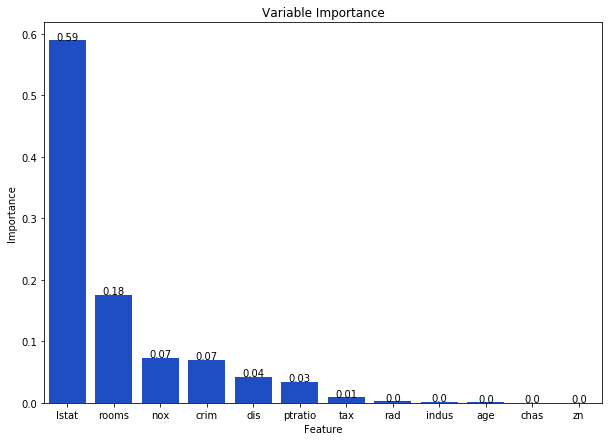

In [213]:

# Score the final model
final_model = GBR(max_depth=2, n_estimators=60, random_state=RANDOM_SEED)
#final_model = RFR(max_features="log2", n_estimators=150, bootstrap = True, random_state=RANDOM_SEED)

fm = final_model.fit(x, y)
boston2['Prediction'] = np.exp(fm.predict(x))


print('Coefficient of determination (R-squared):', r2_score(np.log(boston2['mv']), np.log(boston2['Prediction'])))
rmse = sqrt(mean_squared_error(np.log(boston2['mv']), np.log(boston2['Prediction'])))
print('RMSE :', rmse)




# Capture variable importance in final model
features = boston2.columns[:-2].tolist()
importance = fm.feature_importances_.tolist()

var_imp = pd.DataFrame.from_items([('Feature', features),
                                   ('Importance', importance)])
var_imp.sort_values(by=['Importance'], inplace=True, ascending=False)
var_imp.reset_index(inplace=True)
var_imp.drop(['index'], axis=1, inplace=True)

# Plot variable importance
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.barplot(x='Feature', y='Importance',
                 data=var_imp, errwidth=0,
                 color=sns.xkcd_rgb["blue"])
for index, row in var_imp.iterrows():
    ax.text(row.name, row['Importance']+0.001, round(row['Importance'], 2),
            color='black', ha="center")

plt.title("Variable Importance")
plt.show()
plt.close()



In [214]:
boston2

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv,Prediction
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,26.792035
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,23.985415
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,35.806173
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,34.301040
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,33.828881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4,22.125089
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6,21.077634
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9,26.549579
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0,24.620090


# Conclusions